> # Co czyni ludzi szczęśliwymi?  Analiza raportu z roku 2019

*Projekt tak jak reszta repozytorium został napisany z myślą o nauce DataScience od zera.*

Celem projektu jest zbadanie datasetu [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness). Aby to osiągnąć notatnik został podzielony na kilka segmentów:

O. Omówienie datasetu

A. Import danych, ogląd i czyszczenie

B. Zadanie ciekawych pytań

C. Szukanie odpowiedzi

D. *Bonus*: regresja liniowa z wykorzystaniem scikit_learn

Wykorzystane moduły i zalecane umiejętności:
* pandas i numpy - podstawy modułów przetwarzania danych (dataframe, operacje na zbiorach numpy)
* matplotlib.plot i seaborn - narzędzia wizualizacji danych




# 0. Omówienie datasetu
World Happiness Report klasyfikuje 155 krajów według ich poziomu szczęścia, został opublikowane w ONZ podczas wydarzenia z okazji Międzynarodowego Dnia Szczęścia. Raport nadal zyskuje globalne uznanie, ponieważ rządy, organizacje i społeczeństwo obywatelskie coraz częściej wykorzystują wskaźniki szczęścia do podejmowania decyzji politycznych.

Co składa się na ostateczny ranking? Obywatele oceniają swój poziom zadowolonia związany z konretnymi aspektami życia. Suma wszystkich ocen określa pozycje w rankingu. Składowe:


*   PKB na mieszkańca
*   Rodzina / wsparcie społeczne 
*   Długość życia / opieka zdrowotna
*   Wolność do podejmowania decyzji
*   Szczodrość
*   Zaufanie / Korupcja rządu
*   Dystopian residuals

Dystopia - to wymyślone państwo w którym nikt nie chciałby żyć, czyli takie w którym każdy wskaźnik ma najniższą wartość i do niego porównuje się pozsotałe kraje (dlatego pozostałe mogą być dodatnie)
Dystopian residuals - wartość, która uwzględnia to jak obecne oceny prze- lub niedoszacowują pozostałe 6 aspketów w porównaniu do lat poprzednich.

Więcej pod [linkiem](https://worldhappiness.report/faq/)


# A. Import danych, ogląd i czyszczenie


In [ ]:
#instalacja najnowszych wersji modułów (w tym celu usun komentarze)
#!pip install matplotlib seaborn pandas kaggle numpy --upgrade --quiet

In [ ]:
#import potrzebnych bibliotek

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
#kopiowanie repozytorium
!git clone https://github.com/giastantino/SmallProjects_MLnDS/

Cloning into 'MachineLearning_PL'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 31 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [ ]:
#odpakowanie pobranego pliku - pomin jezeli odpakowales pliki na swoim komputerze

import shutil
shutil.unpack_archive("/content/SmallProjects_MLnDS/Data_Presentation/World_Happiness_Report/Happy_data.zip")

In [ ]:
#stworzenie datasetów dla danych z każdego roku i stworzenie kolumny przechowującej info o roku
#zmiana nazw kolumn na jednolite i usunięce kolumn, które nie pokrywają się w datasetach

In [ ]:
data2015_df = pd.read_csv('2015.csv')
data2015_df['Year']=2015
data2015_df.drop(columns=['Standard Error'], inplace=True)
data2015_df.rename(columns={'Happiness Rank' : 'Rank',
                         'Happiness Score' : 'Score',
                         'Economy (GDP per Capita)' : 'GDP',
                         'Health (Life Expectancy)' : 'Life',
                         'Trust (Government Corruption)' : 'Trust'}, inplace=True)
data2015_df.head()

,Country,Region,Rank,Score,GDP,Family,Life,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
data2016_df = pd.read_csv('2016.csv')
data2016_df['Year']=2016
data2016_df.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
data2016_df.rename(columns={'Happiness Rank' : 'Rank',
                         'Happiness Score' : 'Score',
                         'Economy (GDP per Capita)' : 'GDP',
                         'Health (Life Expectancy)' : 'Life',
                         'Trust (Government Corruption)' : 'Trust'}, inplace=True)
data2016_df.head()

,Country,Region,Rank,Score,GDP,Family,Life,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [ ]:
#dla danych z 2018 i 2019 nie ma wartosci regionu, dlatego przypiszemy je tworzac funkcje
co_re = data2015_df[['Country','Region']].copy()
co_re = co_re.to_numpy()

def what_region(country):
  for i in range(len(co_re)):
    if country == co_re[i][0]: 
      return co_re[i][1] 
  return 'no_region'


In [ ]:
data2017_df = pd.read_csv('2017.csv')
data2017_df['Year']=2017
data2017_df.drop(columns=["Whisker.high","Whisker.low"], inplace=True)
data2017_df.rename(columns={'Happiness.Rank' : 'Rank',
                         'Happiness.Score' : 'Score',
                         'Economy..GDP.per.Capita.' : 'GDP',
                         'Health..Life.Expectancy.' : 'Life',
                         'Trust..Government.Corruption.' : 'Trust',
                         'Dystopia.Residual' : 'Dystopia Residual'}, inplace=True)
data2017_df.head()

,Country,Rank,Score,GDP,Family,Life,Freedom,Generosity,Trust,Dystopia Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [ ]:
#przypiszmy region wedlug panstaw
data2017_df['Region'] = data2017_df['Country'].apply(what_region)
#sprawdzmy ktore kraje nie maja regionu 
data2017_df[data2017_df['Region'] == 'no_region']
#i im go przypiszmy
data2017_df.loc[32,"Region"] = 'Eastern Asia'
data2017_df.loc[49,"Region"] = 'Latin America and Caribbean'
data2017_df.loc[70,"Region"] = 'Eastern Asia'
data2017_df.loc[92,"Region"] = 'Sub-Saharan Africa'
data2017_df.loc[110,"Region"] = 'Sub-Saharan Africa'
data2017_df.loc[146,"Region"] =  'Sub-Saharan Africa'

In [ ]:
data2018_df = pd.read_csv('2018.csv')
data2018_df['Year']=2018
data2018_df.rename(columns={'Overall rank' : 'Rank',
                          'Country or region' : 'Country',
                         'GDP per capita' : 'GDP',
                         'Social support' : 'Family',
                         'Healthy life expectancy' : 'Life',
                         'Freedom to make life choices' : 'Freedom',
                         'Perceptions of corruption' : 'Trust'}, inplace=True)
#przypiszmy region wedlug panstaw
data2018_df['Region'] = data2018_df['Country'].apply(what_region)
data2018_df.loc[37,"Region"] = 'Latin America and Caribbean'
data2018_df.loc[48,"Region"] = 'Latin America and Caribbean'
data2018_df.loc[57,"Region"] = 'Central and Eastern Europe'
data2018_df.loc[97,"Region"] = 'Sub-Saharan Africa'
data2018_df.loc[118,"Region"] = 'Sub-Saharan Africa'
data2018_df.loc[153,"Region"] = 'Sub-Saharan Africa'
#nastepnie wyliczymy Residual Dystopii
data2018_df["Dystopia Residual"] = data2018_df["Score"] - data2018_df["GDP"] - data2018_df["Family"] - data2018_df["Life"] - data2018_df["Freedom"] - data2018_df["Generosity"] - data2018_df["Trust"]
#TRYST NaN
#data2018_df[data2018_df['Trust'].isnull()]

In [ ]:
data2019_df = pd.read_csv('2019.csv')
data2019_df['Year']=2019
data2019_df.rename(columns={'Overall rank' : 'Rank',
                          'Country or region' : 'Country',
                         'GDP per capita' : 'GDP',
                         'Social support' : 'Family',
                         'Healthy life expectancy' : 'Life',
                         'Freedom to make life choices' : 'Freedom',
                         'Perceptions of corruption' : 'Trust'}, inplace=True)

#powtarzamy wszystkie kroki dla poprzedniego roku
data2019_df['Region'] = data2019_df['Country'].apply(what_region)
data2019_df.loc[38,"Region"] = 'Latin America and Caribbean'
data2019_df.loc[63,"Region"] = 'Central and Eastern Europe'
data2019_df.loc[83,"Region"] = 'Central and Eastern Europe'
data2019_df.loc[111,"Region"] = 'Sub-Saharan Africa'
data2019_df.loc[112,"Region"] = 'Sub-Saharan Africa'
data2019_df.loc[119,"Region"] = 'Sub-Saharan Africa'
data2019_df.loc[155,"Region"] = 'Sub-Saharan Africa'

data2019_df["Dystopia Residual"] = data2019_df["Score"] - data2019_df["GDP"] - data2019_df["Family"] - data2019_df["Life"] - data2019_df["Freedom"] - data2019_df["Generosity"] - data2019_df["Trust"]

data2019_df.head()

,Rank,Country,Score,GDP,Family,Life,Freedom,Generosity,Trust,Year,Region,Dystopia Residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe,2.394
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe,2.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe,2.401
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe,2.394


In [ ]:
#połączenie datasetów
happy_df = pd.concat([data2015_df,data2016_df,data2017_df,data2018_df,data2019_df])
happy_df.reset_index(inplace=True)

In [ ]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              782 non-null    int64  
 1   Country            782 non-null    object 
 2   Region             782 non-null    object 
 3   Rank               782 non-null    int64  
 4   Score              782 non-null    float64
 5   GDP                782 non-null    float64
 6   Family             782 non-null    float64
 7   Life               782 non-null    float64
 8   Freedom            782 non-null    float64
 9   Trust              781 non-null    float64
 10  Generosity         782 non-null    float64
 11  Dystopia Residual  781 non-null    float64
 12  Year               782 non-null    int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 79.5+ KB


In [ ]:
happy_df.describe()

,index,Rank,Score,GDP,Family,Life,Freedom,Trust,Generosity,Dystopia Residual,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,781.000000,782.000000
mean,77.703325,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.016262,2016.993606
std,45.182532,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.556589,1.417364
min,0.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184000,2015.000000
25%,39.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.677000,2016.000000
50%,78.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.021000,2017.000000
75%,117.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.371160,2018.000000
max,157.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000


In [ ]:
#sprawdzmy czy mamy jakies wartosci niepozadane
happy_df.isnull().sum()

index                0
Country              0
Region               0
Rank                 0
Score                0
GDP                  0
Family               0
Life                 0
Freedom              0
Trust                1
Generosity           0
Dystopia Residual    1
Year                 0
dtype: int64

# B. Pytania na które szukam odpowiedzi
Naiwne pytania:
0. Jak wyniki prezentują się na mapie świata
1. Który region jest najszczęśliwszy
2. Jaka jest korelacja między składowymi, a szczególnie jak aspekty życia korelują z Wynikiem Szczęsciem (Score)
3. Czy zgodnie z intuicją ocena zdrowia i długości życia zależy od oceny majątku
4. Obywatele którego kraju zmienili swoją ocene najbardziej w czasie 5 lat i dlaczego? Jak zmienia się szczęście Polaków w tym czasie?
5. Dodatkowe pytanie.

# C. Odpowiedzi - wizualizacja wyników

## -1. Zacznijmy od wykresu przedstawiającego wynik dla 10 najbardziej szczęśliwych krajów wraz ze składowymi

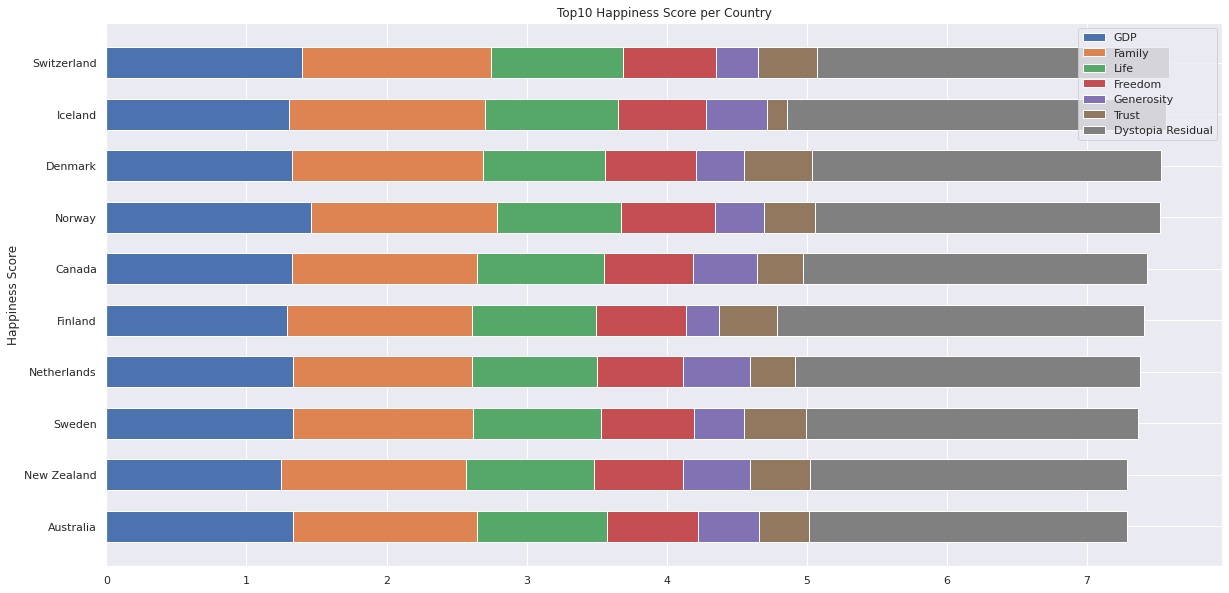

In [ ]:
#stworzmy funkcje resujacą wykres dla danego datesetu, posluzy jako templatka, 
#którą można wykorzystać do narysowania wykresu dla każdego roku
def happy_country_bar(year_df):
  """
  Funkcja tworząca wykres typu stacked bar char w zależności od datasetu
  * year_df - dataset, np. data2015_df
  """
  width = 0.6
  L=0
  labels = year_df.Country.to_numpy()  #pobierzmy nazwy kolumn
  
  # ustawiam styl wykresu
  sns.set(style="darkgrid")
   
  #ponizej kreowane sa czesci wykresu, dla odpowiednio
  fig, ax = plt.subplots(figsize=(20,10))
  #GDP
  ax.barh(labels, year_df.GDP.to_numpy(), width, left = 0, label='GDP',)
  #Family
  L += year_df.GDP.to_numpy()
  ax.barh(labels, year_df.Family.to_numpy(), width, left = L,label='Family')
  #Life
  L += year_df.Family.to_numpy()
  ax.barh(labels, year_df.Life.to_numpy(), width, left = L,label='Life')
  #Freedom
  L += year_df.Life.to_numpy()
  ax.barh(labels, year_df.Freedom.to_numpy(), width, left = L,label='Freedom')
  #Generosity
  L += year_df.Freedom.to_numpy()
  ax.barh(labels, year_df.Generosity.to_numpy(), width, left = L,label='Generosity')
  #Trust
  L +=year_df.Generosity.to_numpy()
  ax.barh(labels, year_df.Trust.to_numpy(), width, left = L,label='Trust')
  #Dystopia Residual
  L += year_df.Trust.to_numpy()
  ax.barh(labels, year_df['Dystopia Residual'].to_numpy(), width, left = L,label='Dystopia Residual',color='gray')

 
  ax.invert_yaxis() #zmiena kolejny na od top1 do top10
  ax.set_ylabel('Happiness Score') #nadajmy nazwe osi
  ax.set_title('Top10 Happiness Score per Country') #nadjmy tytul
  
  ax.legend()   #wyswietlanie legendy
  fig.show()

#wykres dla roku 2015, dla kolejny podmien dataset
happy_country_bar(data2015_df.head(10))





## 0. Teraz nakreślmy wyniki dla każdego państwa na mapie

In [ ]:
!pip install -U plotly 

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.graph_objs as go


#stworzmy funkcje rysującą wynik szczęścia zależnie od datasetu
def happy_map(year_df):
  #tworzenie słownika zgodnie z instrukcją plotly
  fig = go.Figure(data= go.Choropleth(
      locations= year_df['Country'],
      locationmode= 'country names',
      z= year_df['Score'], 
      text= year_df['Country'],
      colorscale= 'Blues',
      autocolorscale= False,
      reversescale= True,
      marker_line_color= 'darkgray',
      marker_line_width=0.8,
      colorbar_title= 'Ocena'
  ))
  
  fig.update_layout(
      title_text = 'Globalne Szczescie 2019',
      geo = dict(
          showframe= False,
          showcoastlines= False,
          projection_type= 'equirectangular'),
      margin={'r':0,'t':50,'l':0,'b':0})
  
  fig.show()  

happy_map(data2015_df)

## 1. Który region jest najszczęśliwszy?
Na podstawie mapy otrzymanych w poprzednim paragrafie spodziewałbym się najwyższych wyników dla ameryki północnej.

In [ ]:
data2015_df.head()

,Country,Region,Rank,Score,GDP,Family,Life,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


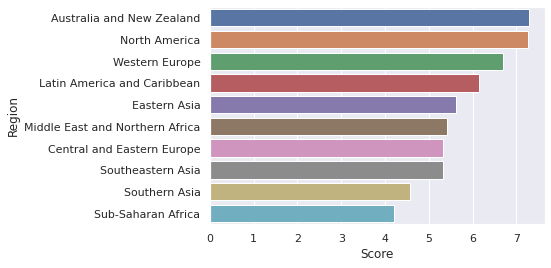

In [ ]:
df = data2015_df.groupby("Region").mean().sort_values(by='Score',ascending=False)['Score']

sns.set_style('darkgrid')
sns.barplot(x=df, y = df.index)


Zgodnie z przewidywaniami region ameryki północnej jest w czołówce. Najszczęśliwszym regionem jednak jest Australia i Ocenia, wynika to z pewnej geograficznej igraszki. Mianowicie są to regiony małe w koteście ilości krajów i dlatego w liczeniu średniej większe znaczenie ma pojedyncza nacja.Natomiast w przypadku Europu czy Azji, gdzie pod uwagę jest brane znacznie więcej krajów średnia w mniejszym stopniu zależy od wyniku pojedynczej nacji. 

Co gdyby zastosować inną miarę średniego szczęścia w regionie? Co gdyby średnia była ważona ze względu na ilość mieszkańców, a regiony zastąpić kontynentami?

In [ ]:
#w tym celu należy pobrać dataset liczby ludności według kraju i połączyć

##2. Jak składowe korelują ze sobą, a w szczególności z ostatecznym wynikiem?

In [ ]:
#sprawdzmy korelacje typu spearman
#odrzucamy kolumne informującą o roku i wyniku w rankingu, ponieważ nie są składowymi ostatecznej sumy szczęścia
cor_mat= data2015_df.drop(columns=['Year','Rank']).corr(method='spearman')
cor_mat

,Score,GDP,Family,Life,Freedom,Trust,Generosity,Dystopia Residual
Score,1.000000,0.795703,0.770038,0.756960,0.576352,0.302397,0.172463,0.532487
GDP,0.795703,1.000000,0.681042,0.847096,0.415421,0.227675,0.012482,0.077430
Family,0.770038,0.681042,1.000000,0.585431,0.528139,0.184599,0.146399,0.190534
Life,0.756960,0.847096,0.585431,1.000000,0.399800,0.168847,0.110256,0.078333
Freedom,0.576352,0.415421,0.528139,0.399800,1.000000,0.463745,0.418458,0.095441
Trust,0.302397,0.227675,0.184599,0.168847,0.463745,1.000000,0.213357,0.054815
Generosity,0.172463,0.012482,0.146399,0.110256,0.418458,0.213357,1.000000,0.008091
Dystopia Residual,0.532487,0.077430,0.190534,0.078333,0.095441,0.054815,0.008091,1.000000


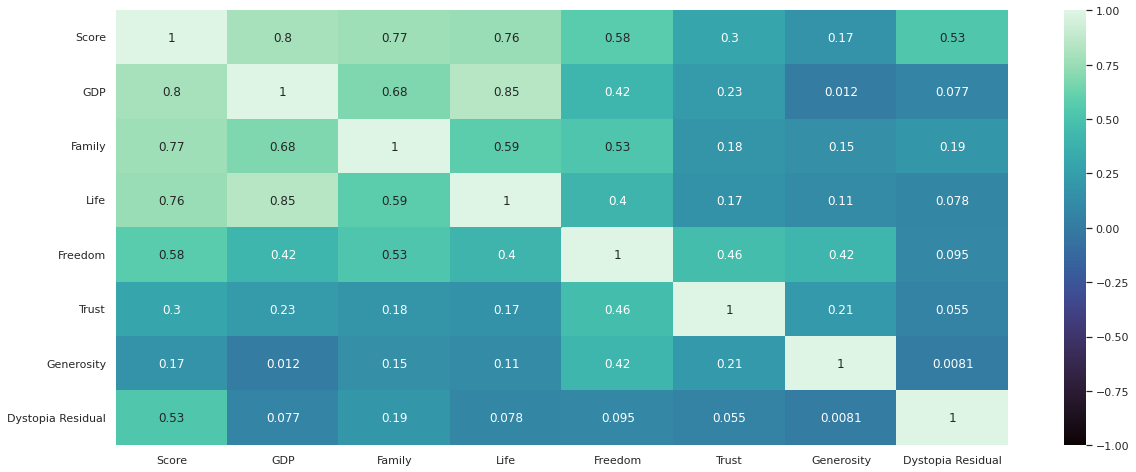

In [ ]:
#narysujmy wykres typu heatmap
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(cor_mat, vmin=-1, vmax=1, center=0, cmap="mako", annot=True)

Wygląda na to, że ekonomia (GDP), rodzina(wsparcie społeczne) i długość zdrowego życia wysoce korelują z ostatecznym wynikiem. Wolność do podejmowania wyborów życiowych (Freedom) natomiast koreluje w sposób umiarkowany  z każdym polem. Zaufanie do rządu nie koreluje ani z wynikiem ani ze żadną składową w sposób istotny - poza wolnością, wniosek dlaczego tak może być nasuwa się sam.

##3. Czy zgodnie z intuicją ocena zdrowia i długości życia zależy od oceny majątku w sposób widoczny?

Wstępnie, w duchu pytania, warto rozserzyć analizę o sprawdzenie korelacji każdej składowej wykorzystując funcje pairplot() modułu seaborn

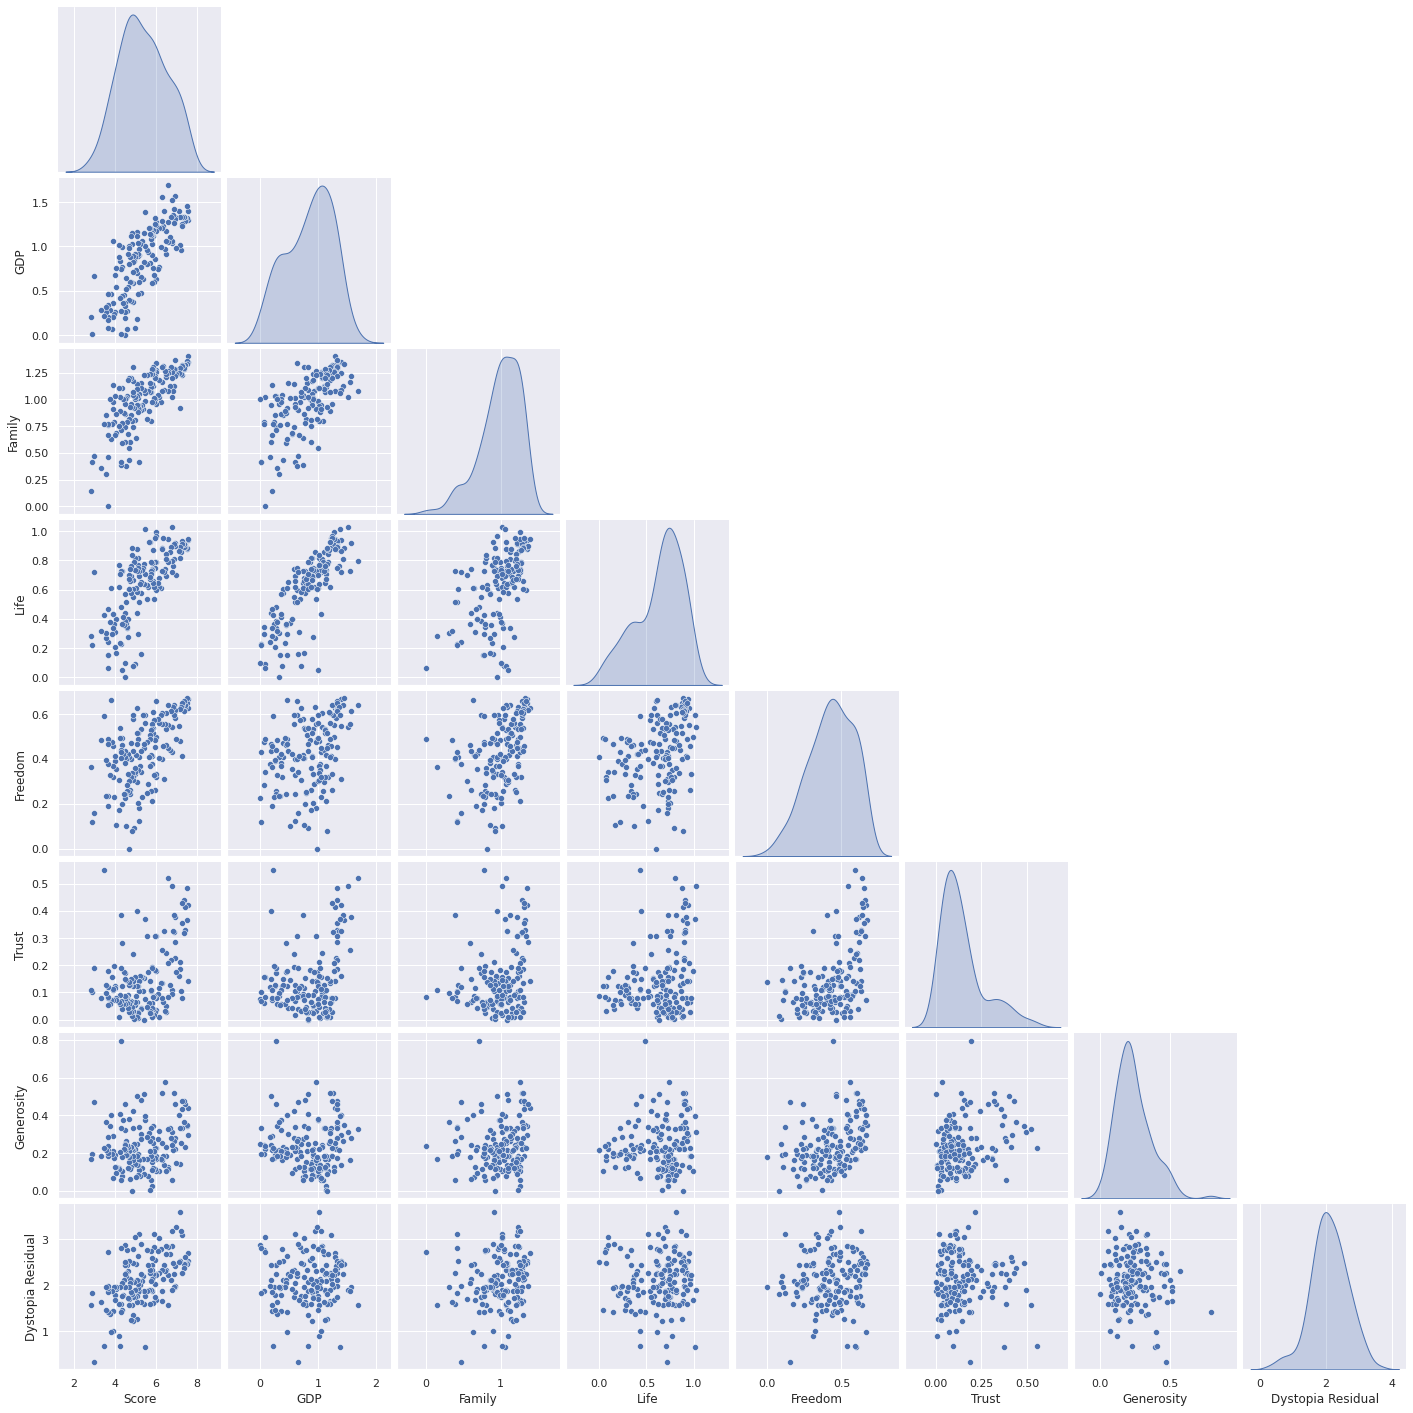

In [ ]:
sns.pairplot(data2015_df.drop(columns=['Year','Rank']), diag_kind='kde', corner=True)

Jasno widać, że wykres oceny Zdrowia(Life) zależy w pewnej mierze od oceny Majątku(GDP) - dla lepszej oceny GDP Life osiąga większą wartość. 

Poniżej przyjrzymy się bliżej tej zależności wykonamy 'scatterplot' wykorzytując metode sns.regplot() z zaimplementowaną regresją liniową w celu znalezienia prostej najlepiej oddając zależność danych.

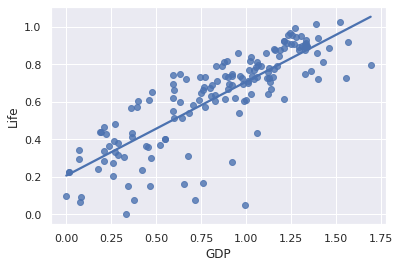

In [ ]:
sns.set_style('darkgrid')
sns.regplot(x = data2015_df.GDP, y = data2015_df.Life, ci=None, scatter=True)

Pomimo kilku danych odstających puntków (dobra ocena majątku i niska ocena zdrowia) widoczny jest trend utrzymujący wśród większości danych, ergo występuje wyraźna zależność obu ocen ale do jednoznacznego ocenienia przyczynowości brakuje nam danych.


##4. Obywatele którego kraju zmienili swoją ocene najbardziej w czasie 5 lat i dlaczego?

Zacznijmy od obliczenia różnicy ocen dla krajów, które występują w obu datasetach dla roku 2015 i 2019. 

Następnie naszkicujemy wykres zmian dla pięciu państw, gdzie była ona największa. Ostatecznie sprawdzimy jaka składowa zmieniła się najbardziej w tych przypadkach. 

In [ ]:
#pracujemy na data2015_df data2019_df

#otrzymujemy liste elementów wspólnych dla obu datasetów
common_countries = np.intersect1d(data2019_df.Country, data2015_df.Country)

#teraz odejmiemy oznaczone rokiem 2015 od tych rokiem 2019
diff_df = pd.DataFrame()
for c in common_countries:
  data2015_df.set_index('Country')
  diff_df = diff_df.append(data2019_df.set_index('Country').drop(columns='Region').loc[c] - data2015_df.set_index('Country').drop(columns='Region').loc[c])




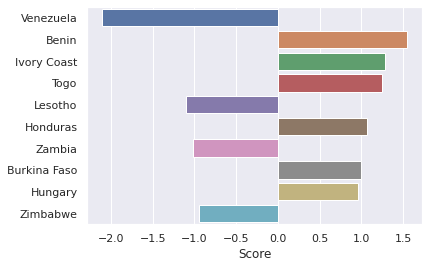

In [ ]:
#indeks dla wartosci gdzie absolutna zmiana oceny szczęścia jest największa
top10_diff_df = diff_df.sort_values(by= 'Score', ascending= False, key= abs).head(10)
top10_diff_ix = top10_diff_df.index
#narysujmy odpowiedni wykres
sns.barplot(x = top10_diff_df.Score, y= top10_diff_ix)

In [ ]:
#sorawdzmy, która składowa zmieniła się najbardziej
top10_diff_df.drop(columns=['Score','Rank','Year','Dystopia Residual']).abs().idxmax(axis=1)

Venezuela       Freedom
Benin           Freedom
Ivory Coast     Freedom
Togo             Family
Lesotho          Family
Honduras         Family
Zambia           Family
Burkina Faso     Family
Hungary          Family
Zimbabwe        Freedom
dtype: object

Państwem, którego obywatele najbardziej zmienili swoją ocenę szczęscia jest **Wenezuela**. Ocena w latach 2015-2019 spadła o 2 punkty. Głównym czynnikiem zmian była ocena wolności do wyborów życiowych. Moim zdaniem taka sytuacja ma związek z obecnym głębokim kryzysem w tym państwie, którym odbił się na mieszkańcach. [[Wiki]](https://pl.wikipedia.org/wiki/Wenezuela#Skutki_gospodarcze_i_społeczne)

Z drugiej strony państwem, którego poziom szczęścia podniósł się najbardziej jest **Benin**. Kraj położony w Afryce jest jednym z nielicznych przykładów udanego przejścia do demokracji. Składową, która najbardziej się poprawił jest ponownie wolność do podejmowania życiowych wyborów. Wydaje mi się, że nie jest przypadkiem, że w okresie 2015-2019 a dokładnie w 2016 roku zniesiono karę śmierci w Beninie, a wybory konsekwentie wygrywają partie demokratyczne i progrewistyczne. [[Wiki]](https://pl.wikipedia.org/wiki/Benin)

**Zbadajmy** sprawę nieco głębiej. Zobaczmy wykresy wszystkich składowych dla tych dwóch państw.


---

*Obserwacja do dalszego zbadania:* Czy to przypadek? Państwem w którym również podniosła się ocena szczęścia znacząco są Węgry. Jednak w tym przypadku główną składową jest ocena wsparcia społecznego i życia rodzinnego. Na Węgrzech rządy w okresie wspomnianych badań konsekwetnie sprawowała partia prawicowa i konserwatywna [Fidesz](https://pl.wikipedia.org/wiki/Fidesz). Czy zatem można pokusić się o stwierdzenie, że wolność wyboru jest ważniejszym czynnikiem w społeczeństwach postępowych a poczucie wspracia społecznego i rodzinnego dominuje w ocenie państwach konserwatywnych? A może to przypadek? W celu znalezienia odpowiedzi należy dokonać szerszej analizy, np. dla reszty krajów w omawianych zbiorach danych i/lub sięgnąc po innej zbiory danych.

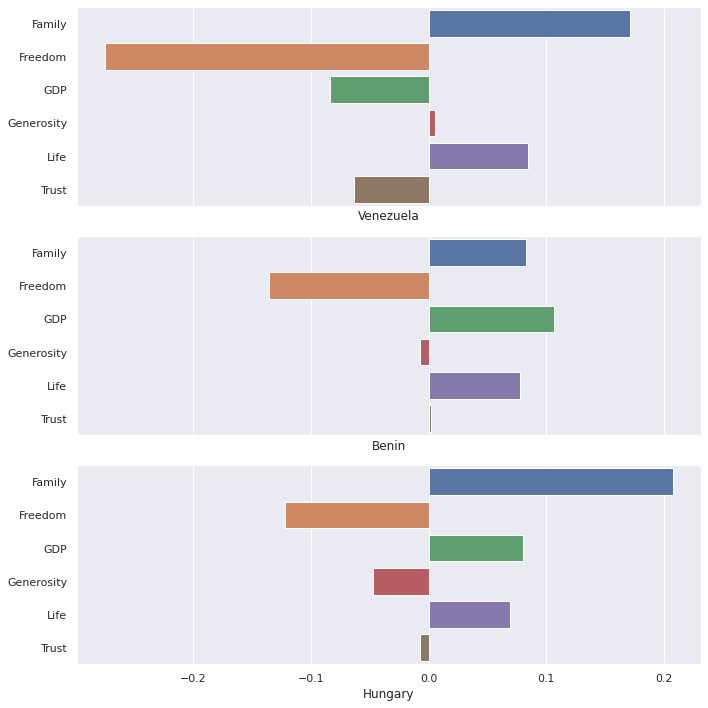

In [ ]:
# top10_diff_df.reset_index(drop=False).rename(columns= {'index' : 'Country'})
top10_diff_stripped_df = top10_diff_df.drop(columns=['Score','Rank','Year','Dystopia Residual'])

fig, ax = plt.subplots(3, 1, figsize= (10,10), sharex= True)

sns.barplot(ax= ax[0], y= top10_diff_stripped_df.columns, x= top10_diff_stripped_df.loc['Venezuela'])

sns.barplot(ax= ax[1], y= top10_diff_stripped_df.columns, x= top10_diff_stripped_df.loc['Benin'])

sns.barplot(ax= ax[2], y= top10_diff_stripped_df.columns, x= top10_diff_stripped_df.loc['Hungary'])

fig.tight_layout()
fig.show()

##5. Jak kraje świata zależą od trzech najbardziej wpływowych składowych?

Innymi słowy, które z majątku, rodziny i zdrowia jest najważniejsze dla różnych krajów? Bierzemy pod uwagę tylko te trzy składowe, gdyż one pokazują największą korelacje z ostatecznym wynikiem szczęścia.


---
Zaczniemy od stworzenie odpowiedniego dataframe'u


In [ ]:
rank_df = data2019_df[['Country','GDP', 'Family', 'Life']].rank(axis=0,numeric_only=True, method='dense', ascending=False)
rank_df['Influence'] = rank_df.idxmin(axis=1)
rank_df['Country'] = data2019_df['Country']
rank_df


,GDP,Family,Life,Influence,Country
0,23.0,2.0,19.0,Family,Finland
1,14.0,4.0,17.0,Family,Denmark
2,7.0,3.0,11.0,Family,Norway
3,15.0,1.0,12.0,Family,Iceland
4,12.0,14.0,16.0,GDP,Netherlands
...,...,...,...,...,...
151,127.0,134.0,75.0,Life,Rwanda
152,120.0,121.0,88.0,Life,Tanzania
153,128.0,141.0,107.0,Life,Afghanistan
154,145.0,145.0,118.0,Life,Central African Republic


In [ ]:
!pip install -U plotly.express


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -H


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def influence_map(rank_df):
  #tworzenie słownika zgodnie z instrukcją plotly.express.choropleth
 
  fig = px.choropleth(locations= rank_df['Country'],
                      locationmode= 'country names',
                      color= rank_df['Influence'],
                      color_discrete_map= {'Family' : 'blue',
                                           'GDP' : 'gold',
                                           'Life' : 'green'})
  
  fig.update_layout(title = 'Three most influential aspects of Happiness',margin={'r':0,'t':50,'l':0,'b':0})
  fig.show()

influence_map(rank_df)

# D.  *Bonus:* Regresja liniowa

Z wykorzystaniem modułu scikit_learn stworzymy model regresji liniowej przewidujący wynik szczęścia w zależności od 3 najbardziej skorelowanych składowych: majątek, rodzina i zdrowie.

In [ ]:
#najpierw stworzymy dane wejsciowe X i oczekiwane Y
def get_data(df, cols):
  X = df[cols]
  Y = df['Score']
  return X, Y

cols = ['GDP','Life','Family']
X, y = get_data(data2019_df, cols)

In [ ]:
from sklearn.model_selection import train_test_split

#dzielimy dane na podzbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.83, random_state= 420)

from sklearn.preprocessing import StandardScaler
#standaryzujemy dane
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn import linear_model

#tworzymy instancje modelu
model = linear_model.LinearRegression()
#trenujemy model
model.fit(X_train, y_train)
#dokonujemy predykcji
y_pred = model.predict(X_test)

In [ ]:
ml_df = pd.DataFrame({'True' : y_test,
                      'Predicted' : y_pred,
                      'Diff_abs' : abs(y_pred - y_test)})
ml_df.head()

,True,Predicted,Diff_abs
25,6.444,6.037957,0.406043
66,5.653,4.526571,1.126429
110,4.681,4.702377,0.021377
71,5.525,5.552086,0.027086
57,5.886,6.451283,0.565283


In [ ]:
#sprawdzmy wagi przypisane składowym przez
ml_coef = pd.DataFrame({'GDP_w' : model.coef_[0], 'Life_w' : model.coef_[1], 'Family_w' : model.coef_[2]},
                       index=[0])
ml_coef.head()


,GDP_w,Life_w,Family_w
0,0.331271,0.299125,0.385059


MSE: 0.31
Wspolczynnik determinacji R2: 75.17%


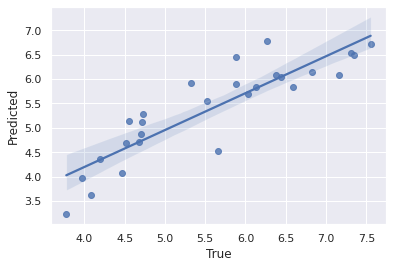

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#sprawdzmy dokladnosc modelu
#średni błąd kwadratowy
print(f'MSE: { mean_squared_error(y_test, y_pred):.2f}')
# Współczynnik determinacji R2 wyrazajacy dokladnosc predykcji,  w procentach
print(f'Wspolczynnik determinacji R2: {r2_score(y_test, y_pred) *100:.2f}%')

sns.regplot(x= 'True',y= 'Predicted',data= ml_df);  